In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')


In [3]:
#loading the dataset as pandas dataframe

data = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Studies\ML\ML assignment\CE802_P3_Data\CE802_P3_Data.csv")
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,Low,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,USA,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,High,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,UK,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,Very high,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,USA,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,High,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,Europe,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,Low,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,Europe,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,High,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,Europe,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,Medium,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,UK,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,Medium,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,USA,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,Low,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,Rest,4671.33,561.90,0.00


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   int64  
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   object 
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [5]:
#checking the catagorical values

data['F6'].value_counts()

Very low     312
Low          310
High         301
Very high    290
Medium       287
Name: F6, dtype: int64

In [6]:
data['F14'].value_counts()

Europe    407
UK        380
USA       360
Rest      353
Name: F14, dtype: int64

In [7]:
#converting the catagorical values to numarical values

text_to_num = {'F6':  {'Very low':0,'Low':1,'High':3,'Very high':4,'Medium':2},
               'F14': {'Rest':0 ,'USA':1,'UK':2,'Europe': 3}}
data = data.replace(text_to_num)
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,6.57,2,1.42,119.73,-3.34,1,7.83,-4506.63,-16448.13,-214.64,6.96,-29.12,6,1,3835.29,660.06,288.54
1,17.64,2,0.70,102.48,-9.77,3,2.43,-3326.25,-15865.93,-199.36,9.20,-30.42,4,2,4130.94,683.22,1075.23
2,6.06,1,14.72,249.60,-2.26,4,4.29,-2206.02,-11705.56,-149.86,12.97,-21.58,16,1,5305.89,769.83,1722.09
3,2.07,3,0.00,149.85,-0.99,3,3.50,-2798.73,-13815.70,-219.50,5.78,-38.10,10,3,2149.47,720.63,3376.78
4,18.99,5,1.92,26.67,-5.62,1,3.10,-4357.92,-18105.59,-208.86,7.38,-7.06,6,3,5115.03,789.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,12.33,9,2.64,206.46,-3.44,3,6.73,-2566.77,-23124.56,-140.32,9.82,-38.42,8,3,3759.72,722.07,2952.31
1496,0.96,3,48.70,91.20,-3.68,2,3.46,-3142.26,-17738.33,-121.30,11.10,-31.12,8,2,5409.42,987.69,0.00
1497,7.89,3,57.82,-65.46,-1.72,2,2.63,-1500.72,-15052.66,-253.74,6.19,-15.24,6,1,4109.13,688.32,23.73
1498,3.75,5,59.36,78.69,-3.43,1,2.28,-4507.05,-14998.52,-214.40,7.31,-28.96,8,0,4671.33,561.90,0.00


# Linear Regression Model 

In [8]:
#spliting the train and test data

x = data.drop(columns = 'Target')
y = data['Target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

#data preprocessing

scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled =scaler.fit_transform(x_test)

lin_model = LinearRegression()
lin_model.fit(x_train_scaled,y_train)

pred  = pd.DataFrame(lin_model.predict(x_test_scaled))


r2 = r2_score(y_test,pred)
MAE = mean_absolute_error(y_test,pred)
rt_MSE = np.sqrt(mean_squared_error(y_test,pred))
mn_per_err = mean_absolute_percentage_error(y_test,pred)

print('Test R2 score: ',r2)
print('mean absolute error :',MAE)
print('Root Mean squared Error :',rt_MSE)
print('Mean Absolute Percentage Error :',mn_per_err)

Test R2 score:  0.7909561293829047
mean absolute error : 418.1884168038721
Root Mean squared Error : 524.5204472662289
Mean Absolute Percentage Error : 4.4492610385872595e+17


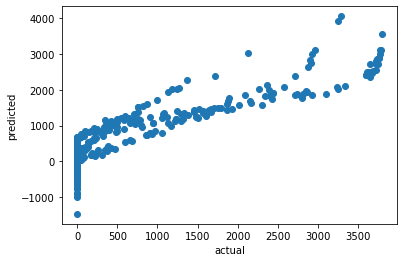

In [9]:
plt.scatter(y_test,pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## RandomForestRegressor


In [10]:
RF_model = RandomForestRegressor()
RF_model.fit(x_train_scaled,y_train)

pred_RF  = pd.DataFrame(RF_model.predict(x_test_scaled))


r2 = r2_score(y_test,pred_RF)
MAE = mean_absolute_error(y_test,pred_RF)
rt_MSE = np.sqrt(mean_squared_error(y_test,pred_RF))
mn_per_err = mean_absolute_percentage_error(y_test,pred_RF)

print('Test R2 score: ',(r2))
print('mean absolute error :',MAE)
print('Root Mean squared Error :',rt_MSE)
print('Mean Absolute Percentage Error :',mn_per_err)

Test R2 score:  0.7152961907718128
mean absolute error : 477.160969
Root Mean squared Error : 612.1253181540652
Mean Absolute Percentage Error : 4.839772698055411e+17


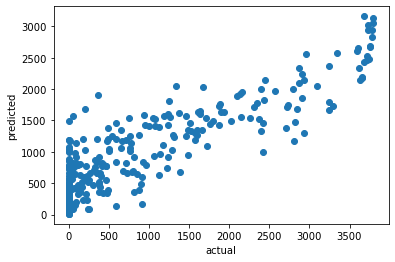

In [11]:
plt.scatter(y_test,pred_RF)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## GradientBoostingRegressor

In [12]:
GB_model = GradientBoostingRegressor()
GB_model.fit(x_train_scaled,y_train)

pred_GB  = pd.DataFrame(GB_model.predict(x_test_scaled))


r2 = r2_score(y_test,pred_GB)
MAE = mean_absolute_error(y_test,pred_GB)
rt_MSE = np.sqrt(mean_squared_error(y_test,pred_GB))
mn_per_err = format(round(mean_absolute_percentage_error(y_test,pred_GB),4))

print('Test R2 score: ',(r2))
print('mean absolute error :{}'.format(round(MAE),2))
print('Root Mean squared Error :',rt_MSE)
print('Mean Absolute Percentage Error :',mn_per_err)

Test R2 score:  0.8261796224715945
mean absolute error :358
Root Mean squared Error : 478.29302575405103
Mean Absolute Percentage Error : 3.7610977581381984e+17


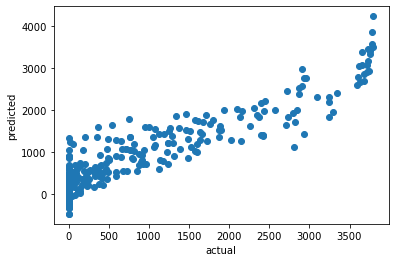

In [13]:
plt.scatter(y_test,pred_GB)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# Comparative Study

The methods used to evaluating the models are r2_score,mean squared error,mean absolute error and mean absolute percentage error.
While comparing the models the GradientBoostingRegressor has the maximum r2 score value(0.82),compared to the linear regressor(0.79)and RandomForestRegressor(0.72),higher the r2 score better the model prediction.

Also the mean absolute error percentage is lowest in GradientBoostingRegressor with a value of 3.79,which is a measure of prediction accuracy ,Its value less than 5% is considered as an indication that the forecast is acceptably accurate.

It should also noted that while plotting actual vs predicted values the model is not performing well with the features that have an output zero.

# Prediction on a Hold-out Test Set

In [14]:
#loading the test dataset

test_set = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Studies\ML\ML assignment\CE802_P3_Data\CE802_P3_Test.csv")
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,19.62,4,64.06,43.65,-3.45,Very high,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,Rest,2833.83,630.81,NaN
1,8.91,3,0.00,-29.13,-5.45,Low,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,Europe,5011.47,623.01,NaN
2,8.55,2,0.94,175.35,-4.77,High,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,UK,3835.32,684.15,NaN
3,26.73,3,1.86,163.71,-6.74,Low,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,UK,2372.91,777.60,NaN
4,5.52,5,6.74,298.77,-8.34,Low,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,Rest,5324.61,724.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,High,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,USA,4696.83,579.36,NaN
1496,14.67,4,217.94,136.71,-2.16,Low,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,USA,3952.08,747.75,NaN
1497,12.96,4,18.88,210.78,1.85,Very low,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,Europe,4269.81,794.01,NaN
1498,14.22,7,0.68,177.42,-3.61,Very low,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,UK,4401.87,772.29,NaN


In [15]:
#converting the catagorical values to numarical values

text_to_num_test = {'F6':  {'Very low':0,'Low':1,'High':3,'Very high':4,'Medium':2},
               'F14': {'Rest':0 ,'USA':1,'UK':2,'Europe': 3}}
test_set = test_set.replace(text_to_num)
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,19.62,4,64.06,43.65,-3.45,4,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,0,2833.83,630.81,NaN
1,8.91,3,0.00,-29.13,-5.45,1,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,3,5011.47,623.01,NaN
2,8.55,2,0.94,175.35,-4.77,3,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,2,3835.32,684.15,NaN
3,26.73,3,1.86,163.71,-6.74,1,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,2,2372.91,777.60,NaN
4,5.52,5,6.74,298.77,-8.34,1,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,0,5324.61,724.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,3,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,1,4696.83,579.36,NaN
1496,14.67,4,217.94,136.71,-2.16,1,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,1,3952.08,747.75,NaN
1497,12.96,4,18.88,210.78,1.85,0,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,3,4269.81,794.01,NaN
1498,14.22,7,0.68,177.42,-3.61,0,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,2,4401.87,772.29,NaN


In [16]:
x_testset = test_set.drop(columns='Target')
x_testset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16
0,19.62,4,64.06,43.65,-3.45,4,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,0,2833.83,630.81
1,8.91,3,0.00,-29.13,-5.45,1,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,3,5011.47,623.01
2,8.55,2,0.94,175.35,-4.77,3,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,2,3835.32,684.15
3,26.73,3,1.86,163.71,-6.74,1,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,2,2372.91,777.60
4,5.52,5,6.74,298.77,-8.34,1,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,0,5324.61,724.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,3,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,1,4696.83,579.36
1496,14.67,4,217.94,136.71,-2.16,1,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,1,3952.08,747.75
1497,12.96,4,18.88,210.78,1.85,0,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,3,4269.81,794.01
1498,14.22,7,0.68,177.42,-3.61,0,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,2,4401.87,772.29


In [19]:
#predicting the output class using RandomForestClassifier model
pred_test  = pd.DataFrame(RF_model.predict(x_testset))

#Adding the predicted values to the class coloumn in the test dataset
test_set.iloc[:,-1] = pred_test
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,19.62,4,64.06,43.65,-3.45,4,6.51,-3379.32,-10702.17,-252.84,6.16,-28.80,10,0,2833.83,630.81,2201.0195
1,8.91,3,0.00,-29.13,-5.45,1,2.72,-4726.20,-18639.21,-182.04,4.12,-37.92,6,3,5011.47,623.01,1754.6451
2,8.55,2,0.94,175.35,-4.77,3,1.91,-2800.83,-20690.94,-262.80,3.76,-26.42,6,2,3835.32,684.15,2399.7643
3,26.73,3,1.86,163.71,-6.74,1,3.20,-4202.19,-14001.97,-258.80,4.53,-24.74,10,2,2372.91,777.60,2334.9465
4,5.52,5,6.74,298.77,-8.34,1,2.77,-3333.69,-14949.07,-275.84,6.24,-31.00,2,0,5324.61,724.44,2065.5545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.84,3,6.76,178.83,-4.45,3,4.82,-2487.90,-14300.95,-248.86,3.97,-32.06,8,1,4696.83,579.36,2393.7661
1496,14.67,4,217.94,136.71,-2.16,1,5.24,-3589.92,-17406.68,-217.44,10.18,-30.12,6,1,3952.08,747.75,2334.9465
1497,12.96,4,18.88,210.78,1.85,0,0.60,-3147.93,-14315.11,-199.28,9.19,-23.96,8,3,4269.81,794.01,2418.7503
1498,14.22,7,0.68,177.42,-3.61,0,1.39,-3273.96,-10592.68,-139.00,8.26,-21.26,0,2,4401.87,772.29,2145.5991


In [18]:
#saving the outputdata in csv format
test_set.to_csv('CE802_P3_Test.csv ',index = False)